# 영역 분할

[여러 영역분할 알고리즘 논문](https://arxiv.org/pdf/1612.01601)

## SLIC (simple linear iteractive clustering)

In [1]:
import skimage

In [2]:
import numpy as np
import cv2 as cv

In [3]:
import matplotlib.pyplot as plt

In [24]:
from skimage import segmentation, graph

In [6]:
img_path = './sample/pattern_001.jpg'
# img = cv.cvtColor(cv.imread(img_path),cv.COLOR_BGR2RGB)
img = cv.imread(img_path)

In [13]:
slic1 = segmentation.slic(img,compactness=40, n_segments= 600)

In [14]:
sp_img1=segmentation.mark_boundaries(img,slic1)

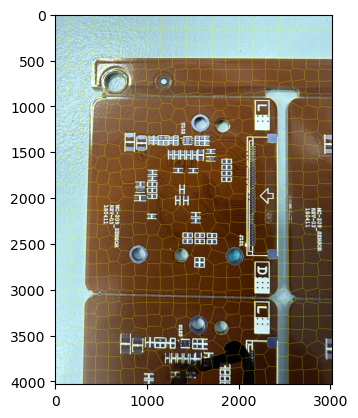

In [18]:
sp_img1=np.uint8(sp_img1*255.0)
plt.imshow(sp_img1)
# plt.imshow(cv.cvtColor(sp_img1,cv.COLOR_BGR2RGB))

In [25]:
import time

(4032, 3024, 3)  img를 분할하는데  88.92255163192749 초 소요


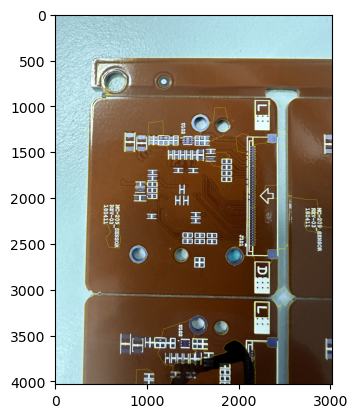

In [26]:
start=time.time()  # 분할하는 데 걸리는 시간을 측정해 출력
slic=segmentation.slic(img,compactness=20,n_segments=600,start_label=1)
g=graph.rag_mean_color(img,slic,mode='similarity') 
ncut=graph.cut_normalized(slic,g)	# 정규화 절단
print(img.shape,' img를 분할하는데 ',time.time()-start,'초 소요')

marking=segmentation.mark_boundaries(img,ncut)  # 원래 영상인 coffee에 영역 분할 정보를 담은 ncut 맵을 이용하여 영역 경계를 표 시하고 marking 객체에 저장
ncut_img=np.uint8(marking*255.0)  # 0~1 사이의 실수를 가진 marking을 0~255 사이의 uint8 형으로 변환

plt.imshow(ncut_img)

# 영역 분할 평가

생각보다 영역분할이 잘 이루어지지 않음.

비교적 범위가 큰 영역만 분할됨. 

파라미터를 수정해야할지, 아니면 미세 영역 분할하는 다른 알고리즘을 찾아야 할지 고찰이 필요할 듯함.